In [8]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import PIL.ImageOps  
import numpy as np

In [10]:
FJoin = os.path.join

In [11]:
f_data_final = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
print(f_data_final)

['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']


In [12]:
data_train_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Dataframe_training_final_HOG.csv'
label_train_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Labelframe_training_final_HOG.csv'

data_test_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Dataframe_testing_final_HOG.csv'
label_test_drive_link = '/content/drive/MyDrive/csvdata_HOG_notargument/Labelframe_testing_final_HOG.csv'

In [13]:
def read_data(link_data, link_label):
    data = pd.read_csv(link_data, header=None)
    label = pd.read_csv(link_label, header=None)
    return np.array(data), np.array(label).ravel()

In [14]:
data_train, label_train = read_data(data_train_drive_link, label_train_drive_link)
data_test, label_test = read_data(data_test_drive_link, label_test_drive_link)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score,precision_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
import math
from sklearn.neural_network import MLPClassifier

In [16]:
def change_to_char(num):
  listchar = ['a', 'à', 'á', 'â', 'ầ', 'ấ', 'ẫ', 'ẩ', 'ã', 'ă', 'ằ', 'ắ', 'ẵ', 'ẳ', 'ả', 'ạ', 'ậ', 'ặ', 'b', 'c', 'd', 'e', 'è', 'é', 'ê', 'ề', 'ế', 'ễ', 'ể', 'ẽ', 'ẻ', 'ẹ', 'ệ', 'g', 'h', 'i', 'ì', 'í', 'ĩ', 'ỉ', 'ị', 'k', 'l', 'm', 'n', 'o', 'ò', 'ó', 'ô', 'ồ', 'ố', 'ỗ', 'ổ', 'õ', 'ỏ', 'ơ', 'ờ', 'ớ', 'ỡ', 'ở', 'ợ', 'ọ', 'ộ', 'p', 'q', 'r', 's', 't', 'u', 'ù', 'ú', 'ũ', 'ủ', 'ư', 'ừ', 'ứ', 'ữ', 'ử', 'ự', 'ụ', 'v', 'x', 'y', 'ỳ', 'ý', 'ỹ', 'ỷ', 'ỵ', 'đ']
  listnum = [i for i in range(0,89)]
  if (num >= 0 and num <= 88):
    k = listnum.index(num)
    return listchar[k]
  else:
    return -1

In [17]:
img = cv2.imread('/content/drive/MyDrive/pic_noArgument/datatrain_16x20/a/pic_10.jpg')
img.shape

(20, 16, 3)

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

data_train = data_train.reshape((data_train.shape[0], 20, 16, 1)).astype('float32')
data_test = data_test.reshape((data_test.shape[0], 20, 16, 1)).astype('float32')

print(data_train.shape) 

label_train = np_utils.to_categorical(label_train)
label_test = np_utils.to_categorical(label_test)

print(label_test.shape)

num_classes = label_test.shape[1]

print(num_classes)

(19229, 20, 16, 1)
(4449, 89)
89


In [19]:
data_train.shape

(19229, 20, 16, 1)

In [20]:
label_train.shape

(19229, 89)

In [21]:
model = Sequential()

model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))  

model.add(Conv2D(128, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(256, (3, 2), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(data_train, label_train, validation_data=(data_test, label_test), epochs=20, batch_size=19, verbose=2)

# Final evaluation of the model
scores = model.evaluate(data_test, label_test, verbose=0)
print("CNN Accuracy: %.4f%%" % (scores[1]*100))

Epoch 1/20
1013/1013 - 91s - loss: 2.9602 - accuracy: 0.2442 - val_loss: 2.1983 - val_accuracy: 0.4014
Epoch 2/20
1013/1013 - 72s - loss: 1.2840 - accuracy: 0.6203 - val_loss: 1.5910 - val_accuracy: 0.5651
Epoch 3/20
1013/1013 - 73s - loss: 0.8311 - accuracy: 0.7433 - val_loss: 1.3667 - val_accuracy: 0.6321
Epoch 4/20
1013/1013 - 73s - loss: 0.6139 - accuracy: 0.8092 - val_loss: 1.2466 - val_accuracy: 0.6595
Epoch 5/20
1013/1013 - 74s - loss: 0.4814 - accuracy: 0.8482 - val_loss: 1.3434 - val_accuracy: 0.6732
Epoch 6/20
1013/1013 - 74s - loss: 0.4038 - accuracy: 0.8739 - val_loss: 1.4564 - val_accuracy: 0.6707
Epoch 7/20
1013/1013 - 72s - loss: 0.3405 - accuracy: 0.8917 - val_loss: 1.4255 - val_accuracy: 0.6676
Epoch 8/20
1013/1013 - 71s - loss: 0.2954 - accuracy: 0.9054 - val_loss: 1.4540 - val_accuracy: 0.6802
Epoch 9/20
1013/1013 - 73s - loss: 0.2581 - accuracy: 0.9194 - val_loss: 1.6655 - val_accuracy: 0.6604
Epoch 10/20
1013/1013 - 72s - loss: 0.2260 - accuracy: 0.9282 - val_loss:

In [22]:
f_data_final = np.asarray(f_data_final)

last = []
for i in f_data_final:
  temp = []
  if (i == 'a'):
    temp = ['a']*49
  else:
    temp = [i]*50
  last.append(temp)

test_array = []
for i in last:
  for j in i:
    test_array.append(j)

In [23]:
predicted = model.predict(data_test).argmax(axis=1)

In [24]:
pred_array = []
for i in predicted:
  pred_array.append(f_data_final[i])

In [25]:
data_test2, label_test2 = read_data(data_test_drive_link, label_test_drive_link)

In [26]:
print(classification_report(predicted, label_test2, target_names=f_data_final))

              precision    recall  f1-score   support

           a       0.86      0.93      0.89        45
          à       0.74      0.84      0.79        44
          á       0.70      0.56      0.62        62
          â       0.56      0.88      0.68        32
         ầ       0.58      0.72      0.64        40
         ấ       0.32      0.59      0.42        27
         ẫ       0.36      0.62      0.46        29
         ẩ       0.44      0.49      0.46        45
          ã       0.64      0.57      0.60        56
          ă       0.68      0.62      0.65        55
         ằ       0.30      0.88      0.45        17
         ắ       0.48      0.59      0.53        41
         ẵ       0.58      0.60      0.59        48
         ẳ       0.64      0.43      0.51        75
          ả       0.86      0.60      0.70        72
          ạ       0.92      0.85      0.88        54
         ậ       0.54      0.71      0.61        38
         ặ       0.76    

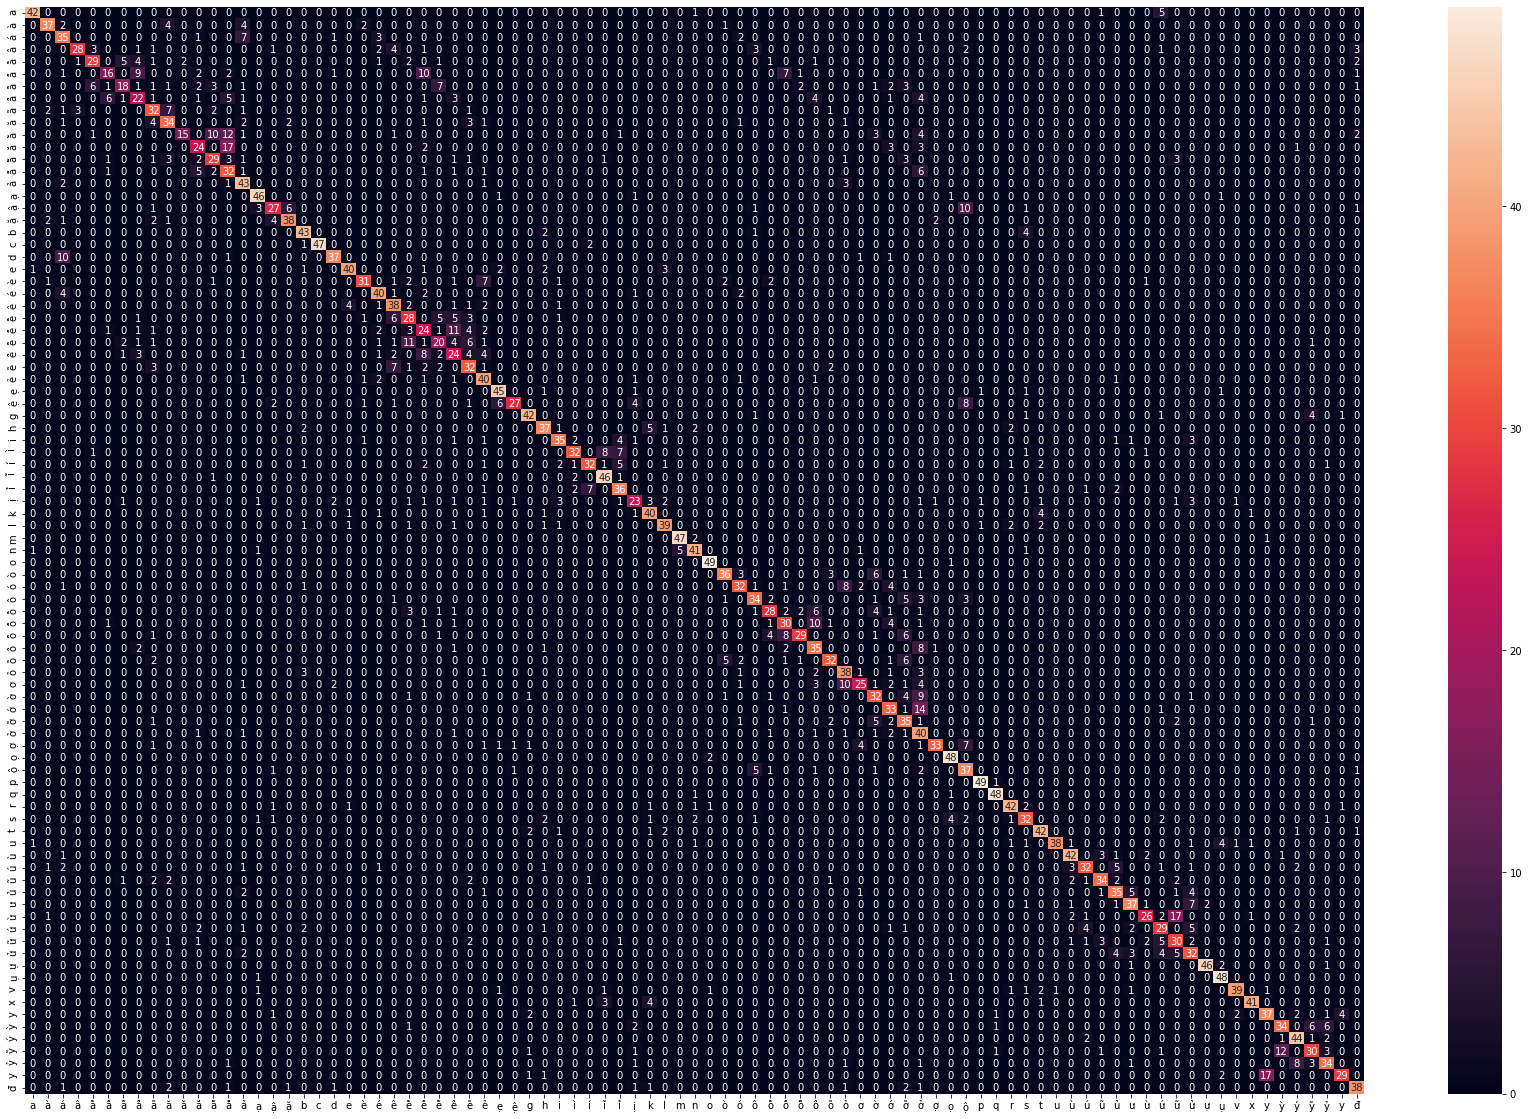

In [27]:
import seaborn as sns
cm=confusion_matrix(test_array, pred_array)
df_cm = pd.DataFrame(cm, f_data_final, f_data_final)
plt.figure(figsize = (30, 20))
sns.heatmap(df_cm, annot=True)